In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# loading the stock prices of all companies in a dataframe
dataset = pd.read_csv('prices-split-adjusted.csv')

In [ ]:
dataset.head()

,date,symbol,open,close,low,high,volume
0,05-01-2016,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,06-01-2016,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,07-01-2016,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,08-01-2016,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,11-01-2016,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246572 entries, 0 to 246571
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246572 non-null  object 
 1   symbol  246572 non-null  object 
 2   open    246572 non-null  float64
 3   close   246572 non-null  float64
 4   low     246571 non-null  float64
 5   high    246571 non-null  float64
 6   volume  246571 non-null  float64
dtypes: float64(5), object(2)
memory usage: 13.2+ MB


In [ ]:
companies=dataset.symbol.unique()
companies

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [ ]:
# since AAL company is used for training, we are creating a new dataframe with AAL parameters
stock = dataset.loc[dataset['symbol'] == 'AAL']
stock.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 252 to 246230
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    525 non-null    object 
 1   symbol  525 non-null    object 
 2   open    525 non-null    float64
 3   close   525 non-null    float64
 4   low     525 non-null    float64
 5   high    525 non-null    float64
 6   volume  525 non-null    float64
dtypes: float64(5), object(2)
memory usage: 32.8+ KB


In [ ]:
stock.head()

,date,symbol,open,close,low,high,volume
252,04-01-2010,AAL,4.84,4.77,4.66,4.94,9837300.0
719,05-01-2010,AAL,4.79,5.31,4.71,5.37,25212000.0
1187,06-01-2010,AAL,5.19,5.09,5.00,5.38,16597900.0
1655,07-01-2010,AAL,5.06,5.24,5.05,5.43,14033400.0
2123,08-01-2010,AAL,5.27,5.14,5.06,5.43,12760000.0


In [ ]:
# creating an array with closing prices
training_set = stock.iloc[:, 4:5].values

In [ ]:
# normalizing the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(525, 1)

In [ ]:
x_train = []   # stores the values of closing price of past 60 days
y_train = []   # y_train stores the values of closing price of present day
timestamp = 60
length = len(training_set)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)


In [ ]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.08849558 0.09481669 0.13147914 0.13780025 0.13906448 0.12389381
 0.12642225 0.13400759 0.18331226 0.18584071 0.19469027 0.20859671
 0.18457649 0.14538559 0.15044248 0.13780025 0.06447535 0.09481669
 0.15297092 0.17572693 0.20986094 0.2136536  0.1908976  0.18584071
 0.23514539 0.27686473 0.28445006 0.28571429 0.28192162 0.35271808
 0.3539823  0.34007585 0.34007585 0.38053097 0.37420986 0.39190898
 0.37294564 0.39190898 0.43489254 0.44753477 0.40581542 0.41466498
 0.42351454 0.42225032 0.43109987 0.48546144 0.4664981  0.47408344
 0.47534766 0.47661188 0.44753477 0.44753477 0.3931732  0.36030341
 0.39696587 0.41845765 0.42730721 0.41972187 0.4159292  0.40834387]


0.3957016434892541


In [ ]:
x_train.shape

(465, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(465, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [ ]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
465/465 [==============================] - 5s 11ms/step - loss: 0.0868
Epoch 2/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0273
Epoch 3/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0204
Epoch 4/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0151
Epoch 5/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0137
Epoch 6/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0131
Epoch 7/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0137
Epoch 8/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0127
Epoch 9/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0123
Epoch 10/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0131
Epoch 11/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0109
Epoch 12/25
465/465 [==============================] - 3s 7ms/step - loss: 0.0110
Epoch 13/25
465/465 [===

Now the model is trained. We will test the performance of our model by plotting the predicted stock prices and actual stock prices of other companies

In [ ]:
test_set = dataset.loc[dataset['symbol'] == 'SIG']   
test_set = test_set.loc[:, test_set.columns == 'close']

In [ ]:
# storing the actual stock prices in y_test starting from 60th day as the previous 60 days are used to predict the present day value.
y_test = test_set.iloc[timestamp:, 0:].values


In [ ]:
# storing all values in a variable for generating an input array for our model 
closing_price = test_set.iloc[:, 0:].values
closing_price_scaled = sc.transform(closing_price)

In [ ]:
# the model will predict the values on x_test
x_test = [] 
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i-timestamp:i, 0])
    
x_test = np.array(x_test)
x_test.shape

(464, 60)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(464, 60, 1)

In [ ]:
# predicting the stock price values
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)

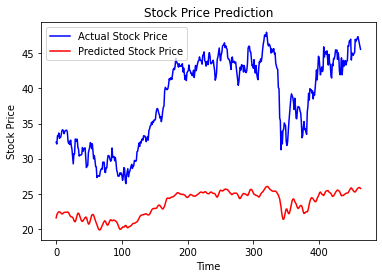

In [ ]:
# plotting the results
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()